In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns 
from scipy import stats
from scipy.stats import chi2_contingency, randint
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

In [14]:
df = pd.read_csv(r"C:\Users\Aleyna\Desktop\KAGGLE\titanic\titanic\train.csv")
testdf = pd.read_csv(r"C:\Users\Aleyna\Desktop\KAGGLE\titanic\titanic\test.csv")

In [15]:
df = pd.DataFrame(df)
testdf = pd.DataFrame(testdf)

In [16]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
df = df.drop(columns=["PassengerId"])

In [19]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
df.Survived.value_counts(normalize=True)
#We know now that the data is mildly imbalanced. 

0    0.616162
1    0.383838
Name: Survived, dtype: float64

<Axes: xlabel='Pclass', ylabel='Survived'>

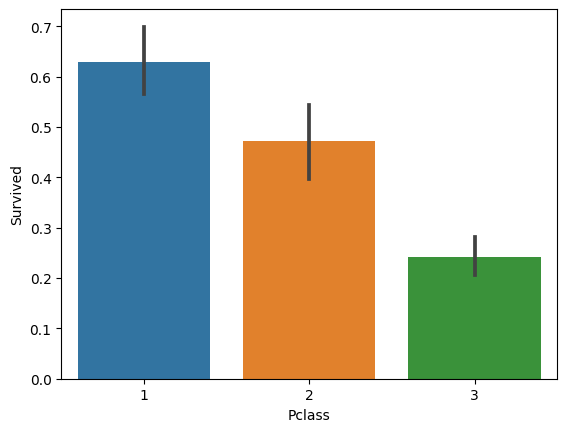

In [51]:
sns.barplot(x = df.Pclass, y= df.Survived)

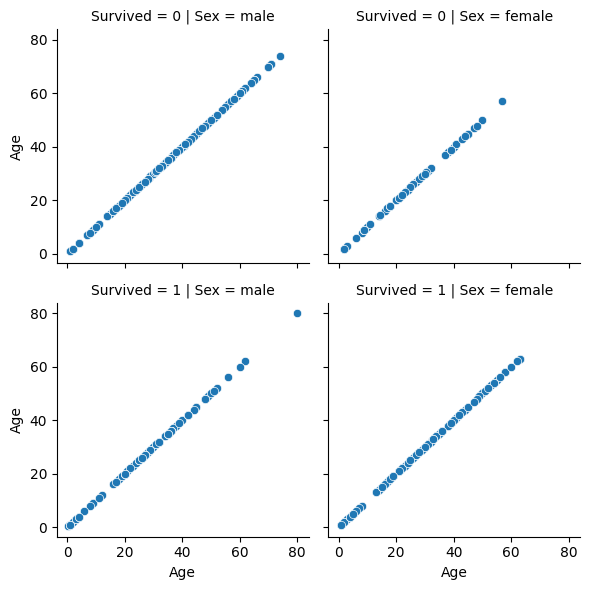

In [66]:
g= sns.FacetGrid(df, col= "Sex", row= "Survived")
g.map(sns.scatterplot, "Age", "Age")
#here we can see that oldest woman on deck was at most 63-ish, and they survived. Age is not an indicator when it comes to women.

<Axes: xlabel='Age', ylabel='Fare'>

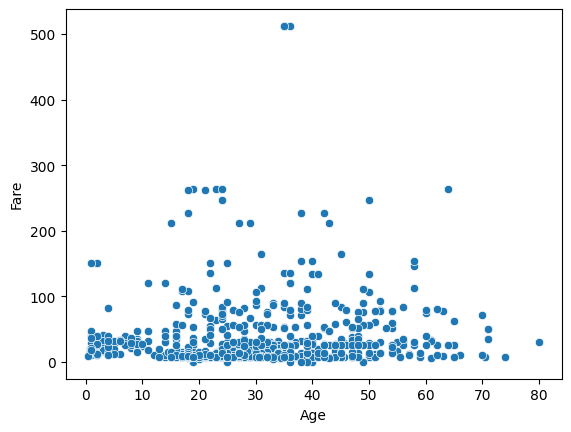

In [79]:
sns.scatterplot(df, x = "Age", y= "Fare")
#There is no correlation between Age and the money paid for the ticket.

<Axes: xlabel='Fare', ylabel='Pclass'>

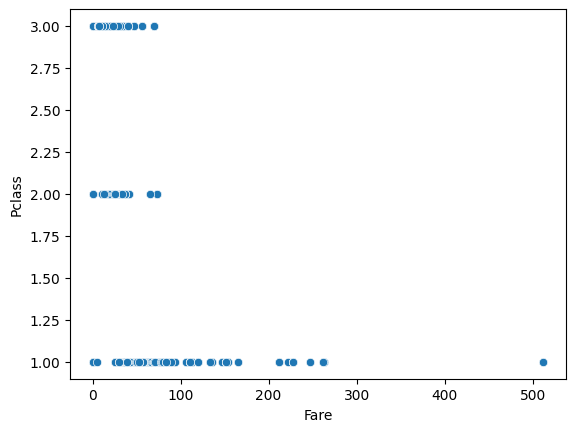

In [80]:
sns.scatterplot(df, x= "Fare", y="Pclass")
#While the fare for 3rd and 2nd class can only go up to 100$, 1st class fares can go upto 500$+.